<a href="https://colab.research.google.com/github/giwon1115/2025-1-myclass-BDA/blob/main/inclass/09w_A_mon_0512_easy_ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##9주차 수업

## 결측값 제거

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [4]:
df.dropna(axis=0)

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [5]:
df.dropna(axis=1)

""
0
1
2
3
4


In [6]:
df.dropna(subset=['score'])#score의 null이 있는 행 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [8]:
df.dropna(subset=['score'],axis=0)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [7]:
df.dropna(subset=['score'],axis=1)

KeyError: ['score']

In [9]:
df_no=df.dropna(subset=['score'])
df_no

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [10]:
df_no['score']+1

,score
0,6.0
1,5.0
2,4.0
3,5.0


In [11]:
df_no=df.dropna(subset=['score','sex'])
df_no

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [12]:
df.score.mean()

np.float64(4.0)

In [13]:
df['score'].mean()

np.float64(4.0)

In [14]:
df.groupby('sex').agg(mean_score=('score','mean'),sum_score=('score','sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [15]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [18]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [np.nan, pd.Timestamp("1940-04-25"),
                             pd.NaT]})
df#NaT=Not a Time

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [19]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True


In [20]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [21]:
df.dropna(axis=1)

,name
0,Alfred
1,Batman
2,Catwoman


In [22]:
df.dropna(axis='columns')

,name
0,Alfred
1,Batman
2,Catwoman


In [23]:
df.dropna(how='any')

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [24]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [25]:
df.dropna(thresh=2)#정상적인값이 2개 인상인 행

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [26]:
df.dropna(thresh=1)

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [27]:
df.dropna(thresh=3)

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [32]:
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [31]:
df.dropna(subset=['name'])

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [30]:
df.dropna(subset=['name','toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [33]:
df.dropna(subset=['born'])

,name,toy,born
1,Batman,Batmobile,1940-04-25


#데이터프레임이 빈 것 확인:empty(속성)

In [34]:
df1=pd.DataFrame()
df1

""


In [35]:
df1.empty

True

In [36]:
df1=pd.DataFrame(index=['row1','row2','row3'])
df1

""
row1
row2
row3


In [37]:
df1=pd.DataFrame(columns=['col1','col2','col3'])

df1

,col1,col2,col3


In [38]:
df1.empty

True

In [39]:
df1=pd.DataFrame(index=['row1','row2','row3'],columns=['col1','col2','col3'])
df1

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [40]:
df1.empty

False

In [41]:
df1=pd.DataFrame(np.nan,index=['row1','row2','row3'],columns=['col1','col2','col3'])
df1

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [43]:
df1=pd.DataFrame(100,index=['row1','row2','row3'],columns=['col1','col2','col3'])
df1

,col1,col2,col3
row1,100,100,100
row2,100,100,100
row3,100,100,100


In [42]:
df1=pd.DataFrame(data=100,index=['row1','row2','row3'],columns=['col1','col2','col3'])
df1

,col1,col2,col3
row1,100,100,100
row2,100,100,100
row3,100,100,100


In [44]:
df1.empty

False

##결측값 대체

In [45]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 2.17 MiB | 3.72 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [46]:
exam=pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [47]:
exam.loc[[2,7,14],['math']]=np.nan #math의 2,7,14행을 nan으로
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


In [49]:
exam.isna().sum().sum()

np.int64(3)

In [50]:
exam.loc[[2,7,14],['math']]

,math
2,NaN
7,NaN
14,NaN


##결측값 채워넣기 fillna()

In [82]:
exam['math']=exam['math'].fillna(100)
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,100.0,86,78
7,8,2,100.0,78,25
14,15,4,100.0,56,78


In [61]:
exam.math.mean()

np.float64(61.95)

In [81]:
exam['math'] = exam['math'].fillna(exam.math.mean())
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,100.0,86,78
7,8,2,100.0,78,25
14,15,4,100.0,56,78


In [63]:
pd.set_option('display.precision', 2)
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,100.0,86,78
7,8,2,100.0,78,25
14,15,4,100.0,56,78


In [67]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [68]:
df['sex'].value_counts()

,count
sex,
1,3
2,2
3,1


In [69]:
df.sex.value_counts().sort_index()

,count
sex,
1,3
2,2
3,1


In [70]:
df.sex.value_counts().sort_values()

,count
sex,
3,1
2,2
1,3


In [71]:
df.score.value_counts()

,count
score,
4,2
5,1
3,1
2,1
6,1


In [72]:
df.score.value_counts().sort_index()

,count
score,
2,1
3,1
4,2
5,1
6,1


In [73]:
df.score.value_counts().sort_values()

,count
score,
5,1
3,1
2,1
6,1
4,2


In [74]:
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [76]:
df['sex']=np.where(df['sex']==3,np.nan,df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [83]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [85]:
df.dropna()

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
4,2.0,2.0


In [84]:
df.groupby('sex').agg(mean_score=('score','mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [87]:
df.dropna().groupby('sex').agg(mean_score=('score','mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [89]:
df=pd.DataFrame(1)
df

ValueError: DataFrame constructor not properly called!

In [88]:
df = pd.DataFrame([1])
df

,0
0,1


In [90]:
df = pd.DataFrame([1,1,2,2])
df

,0
0,1
1,1
2,2
3,2


In [91]:
df = pd.DataFrame([[1,1,2,2]])
df

,0,1,2,3
0,1,1,2,2


In [93]:
df = pd.DataFrame([[1,1,2,2],[10,20,30,40]])
df

,0,1,2,3
0,1,1,2,2
1,10,20,30,40


In [94]:
df=pd.DataFrame({'x1':[1,1,2,2]})
df

,x1
0,1
1,1
2,2
3,2


In [95]:
df['x2']=np.where(df.x1==1,10,np.nan)
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [96]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [97]:
df=pd.DataFrame({'x1':[1,1,2,2]})
df['x2']=np.where(df.x1==1,'a','etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [98]:
df['x2']=df['x2'].replace('etc',np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [99]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [100]:
df=df.fillna(10)
df

,x1,x2
0,1,a
1,1,a
2,2,10
3,2,10


##이상값(outlier) 알아보기

In [19]:
mpg=pd.read_csv('data/mpg.csv')
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
35,chevrolet,malibu,3.5,2008,6,auto(l4),f,18,29,r,midsize
172,subaru,impreza awd,2.5,2008,4,manual(m5),4,20,27,r,compact
26,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater


In [102]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [103]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.00,234.00,234.00,234.00,234.00
mean,3.47,2003.50,5.89,16.86,23.44
std,1.29,4.51,1.61,4.26,5.95
min,1.60,1999.00,4.00,9.00,12.00
25%,2.40,1999.00,4.00,14.00,18.00
50%,3.30,2003.50,6.00,17.00,24.00
75%,4.60,2008.00,8.00,19.00,27.00
max,7.00,2008.00,8.00,35.00,44.00


In [104]:
mpg.describe(include='all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
count,234,234,234.00,234.00,234.00,234,234,234.00,234.00,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.47,2003.50,5.89,NaN,NaN,16.86,23.44,NaN,NaN
std,NaN,NaN,1.29,4.51,1.61,NaN,NaN,4.26,5.95,NaN,NaN
min,NaN,NaN,1.60,1999.00,4.00,NaN,NaN,9.00,12.00,NaN,NaN
25%,NaN,NaN,2.40,1999.00,4.00,NaN,NaN,14.00,18.00,NaN,NaN
50%,NaN,NaN,3.30,2003.50,6.00,NaN,NaN,17.00,24.00,NaN,NaN
75%,NaN,NaN,4.60,2008.00,8.00,NaN,NaN,19.00,27.00,NaN,NaN


In [105]:
%config inlineBackend.figure_f0rmat='retina'

In [106]:
mpg.hwy.describe()#series

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


<Axes: ylabel='hwy'>

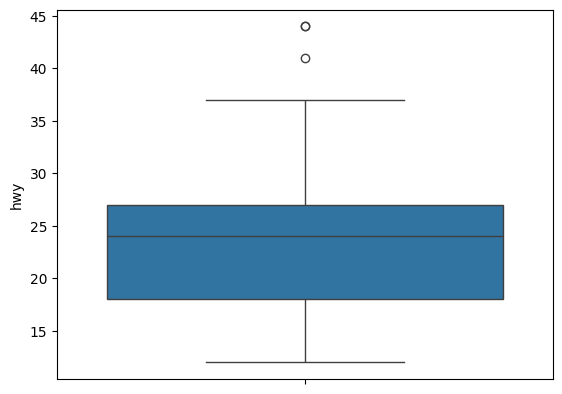

In [109]:
import seaborn as sns
sns.boxplot(data=mpg,y='hwy')#평균값은 안나와있음 맨밑 가로선이 min값 사각형 안 가로선이 50%값 맨 위의 원이max값
#맨 위 직선은 정상범주 내에서의 최대값(자료에는 없음)

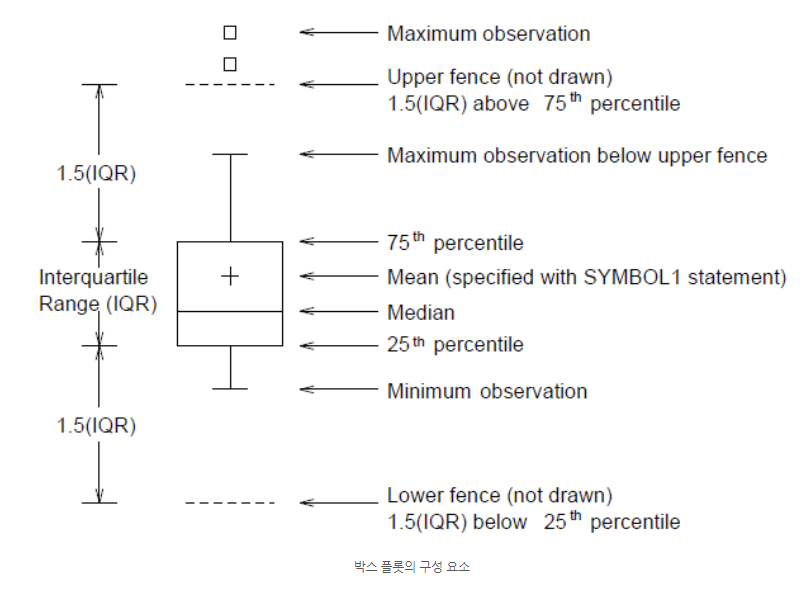

In [111]:
s=pd.Series([1,2,3,4,5])#3=50%값
s

,0
0,1
1,2
2,3
3,4
4,5


In [112]:
s.quantile()

np.float64(3.0)

In [113]:
s.quantile(.5)#50%값

np.float64(3.0)

In [115]:
s.quantile([0,.5,1])#0% 50% 100%값

,0
0.0,1.0
0.5,3.0
1.0,5.0


In [117]:
s.quantile([.1,.2,.5,.75,1])#10% 20% 50% 75% 100%

,0
0.10,1.4
0.20,1.8
0.50,3.0
0.75,4.0
1.00,5.0


In [118]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [120]:
mpg.hwy.quantile([0,.25,.5,.75,1])

,hwy
0.00,12.0
0.25,18.0
0.50,24.0
0.75,27.0
1.00,44.0


In [121]:
a,b=[10,20]#list 안해도 됨
a

10

In [122]:
b

20

In [123]:
p25,p50,p75=mpg.hwy.quantile([.25,.5,.75])
p25,p50,p75

(18.0, 24.0, 27.0)

In [124]:
iqr=p75-p25
iqr

9.0

In [153]:
#upper fence
UF=p75 + 1.5*iqr
UF

40.5

In [154]:
#lower fence
LF=p25-1.5*iqr
LF

4.5

In [155]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [156]:
mpg.hwy.describe()['25%']

np.float64(18.0)

In [157]:
mpg.hwy.describe()['75%']

np.float64(27.0)

In [158]:
mpg[mpg.hwy>UF]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [159]:
mpg[mpg.hwy>UF]['hwy']

,hwy
212,44
221,44
222,41


In [160]:
mpg[mpg.hwy<LF]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category


In [161]:
c

,hwy
212,44
221,44
222,41


In [170]:
mpg['hwy'] = np.where((mpg.hwy < LF) | (mpg.hwy > UF), np.nan, mpg['hwy'])
mpg[mpg.hwy.isna()]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,NaN,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,NaN,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,NaN,d,subcompact


In [171]:
mpg.shape

(234, 11)

In [172]:
len(mpg)

234

In [173]:
dmpg=mpg.dropna(subset=['hwy'])
len(dmpg)

231

In [174]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [175]:
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [176]:
mpg.isna().sum().sum()

np.int64(3)

In [177]:
mpg = pd.read_csv('data/mpg.csv')
mpg.isna().sum().sum()

np.int64(0)

In [180]:
mpg = pd.read_csv('data/mpg.csv')
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [179]:
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [181]:
mpg[ (mpg['hwy'] < LF) | (mpg['hwy'] > UF) ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


##7장종료

##8장 그래프

In [1]:
!pip install koreanize-matplotlib

In [2]:
%config InlineBackend.figure_format = 'retina'#그림 선명하게

In [15]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
plt.rcParams.update({'figure.dpi' : '100'})
plt.rcParams.update({'figure.figsize' : [4, 2.5]})

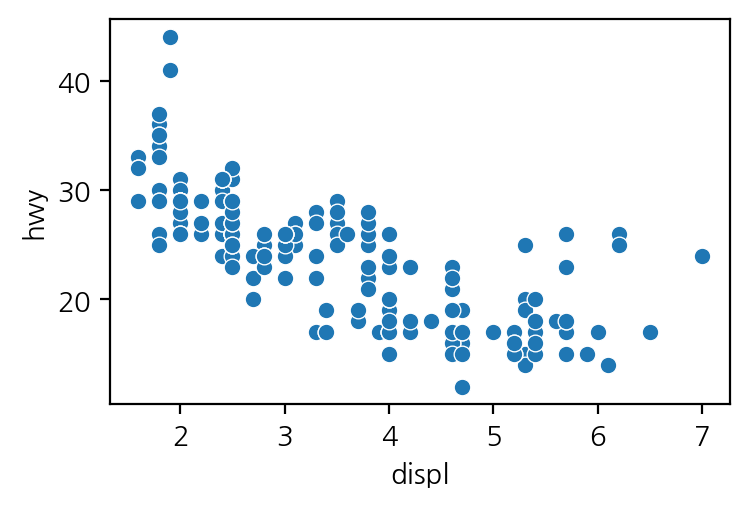

In [20]:
sns.scatterplot(data=mpg, x='displ', y='hwy');

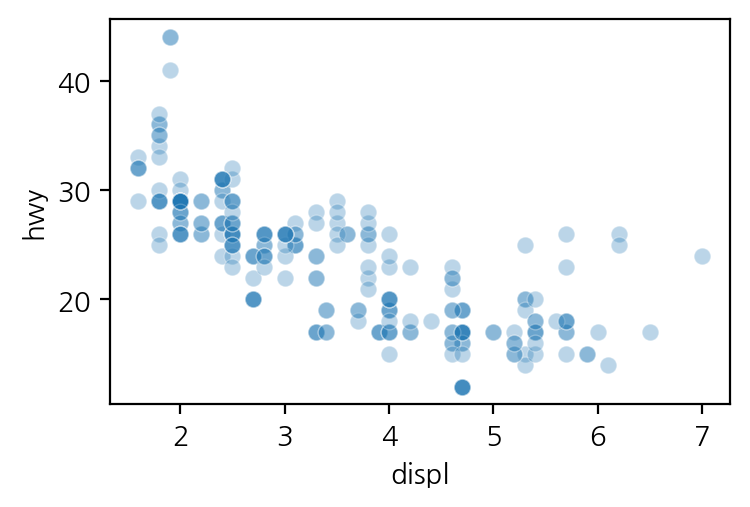

In [21]:
sns.scatterplot(data=mpg, x='displ', y='hwy', alpha=.3);

[(3.0, 6.0)]

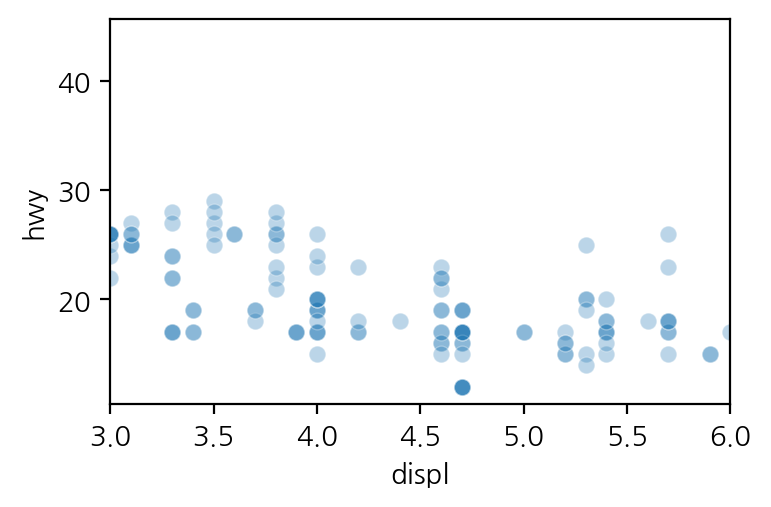

In [22]:
sns.scatterplot(data=mpg, x='displ', y='hwy', alpha=.3).set(xlim=[3,6])#x범위지정

[(3.0, 6.0), (10.0, 30.0)]

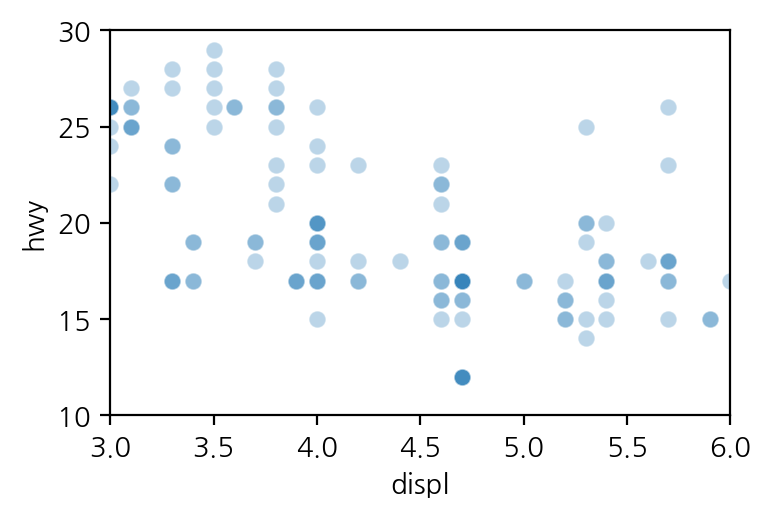

In [23]:
sns.scatterplot(data=mpg, x='displ', y='hwy', alpha=.3).set(xlim=[3,6],ylim=[10,30])

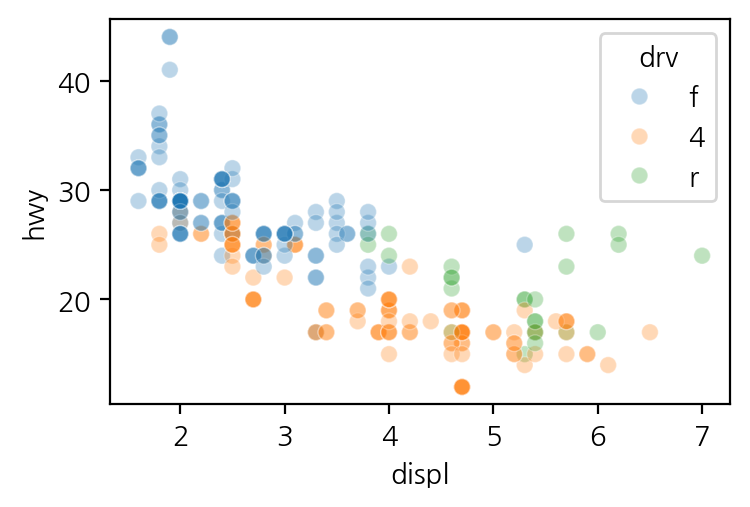

In [24]:
sns.scatterplot(data=mpg, x='displ', y='hwy',hue='drv' ,alpha=.3);

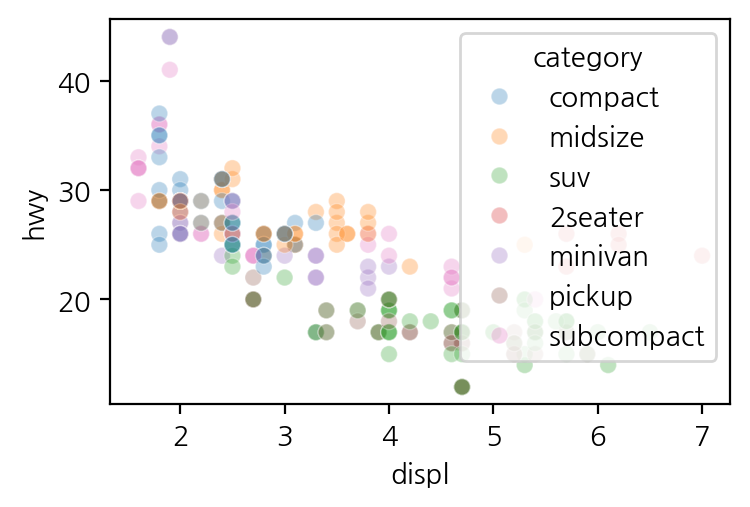

In [25]:
sns.scatterplot(data=mpg, x='displ', y='hwy',hue='category' ,alpha=.3);#차종

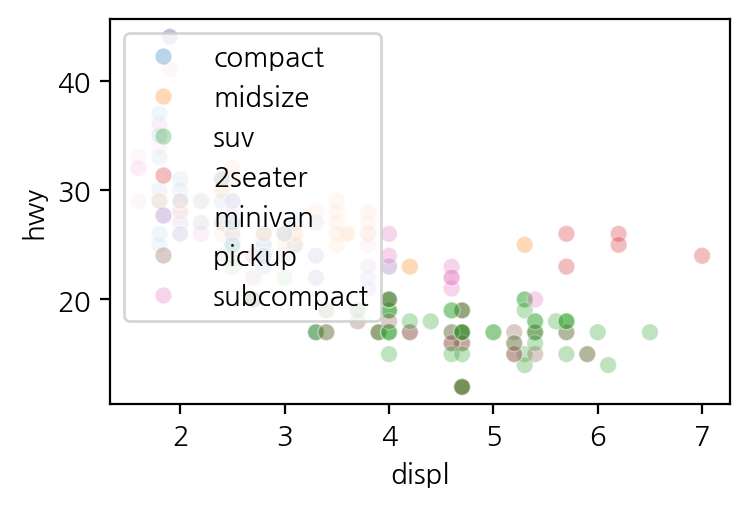

In [26]:
sns.scatterplot(data=mpg, x='displ', y='hwy',hue='category' ,alpha=.3);
plt.legend(loc=2)

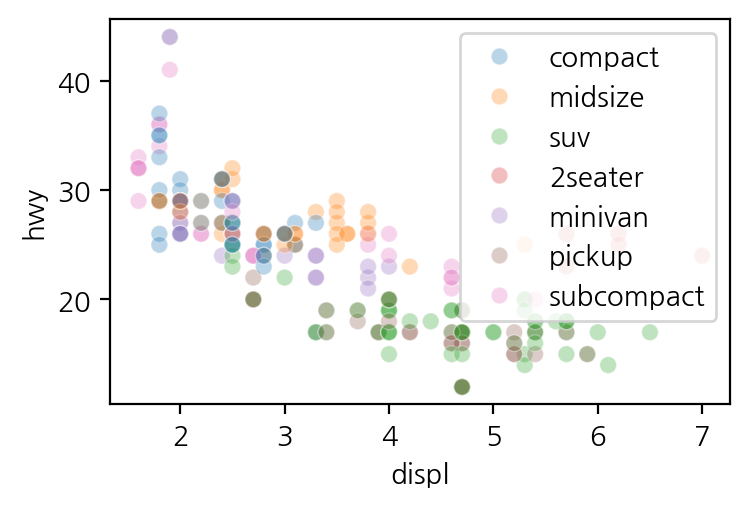

In [27]:
sns.scatterplot(data=mpg, x='displ', y='hwy',hue='category' ,alpha=.3);
plt.legend(loc='upper right');#loc=2랑 동일


| `loc` 값 | 위치                       |
| ------- | ------------------------ |
| `0`     | 최적의 위치 (기본값, "best")     |
| `1`     | 오른쪽 위 ("upper right")    |
| `2`     | 왼쪽 위 ("upper left")      |
| `3`     | 왼쪽 아래 ("lower left")     |
| `4`     | 오른쪽 아래 ("lower right")   |
| `5`     | 가운데 ("center")           |
| `6`     | 왼쪽 가운데 ("center left")   |
| `7`     | 오른쪽 가운데 ("center right") |
| `8`     | 아래 가운데 ("lower center")  |
| `9`     | 위 가운데 ("upper center")   |
| `10`    | 그래프 중앙 ("center")        |


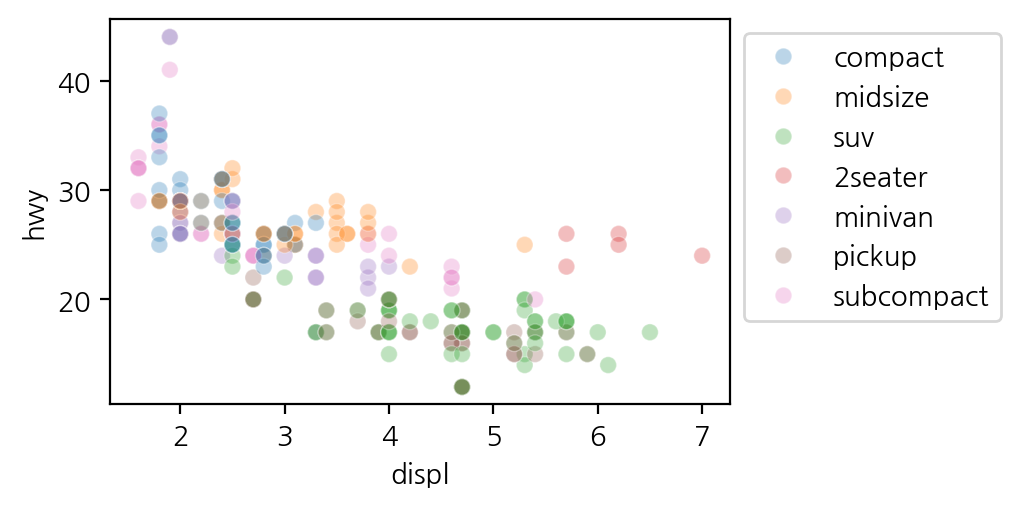

In [48]:
sns.scatterplot(data=mpg, x='displ', y='hwy',hue='category' ,alpha=.3);
plt.legend(loc=2,bbox_to_anchor=(1,1))

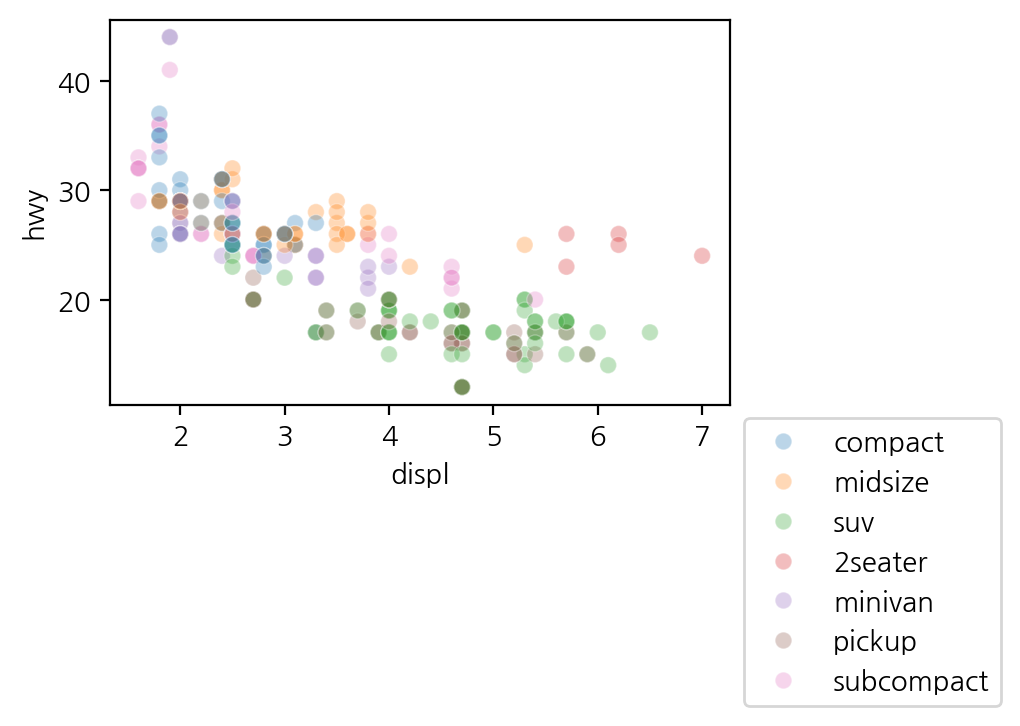

In [46]:
sns.scatterplot(data=mpg, x='displ', y='hwy',hue='category' ,alpha=.3);
plt.legend(loc=2,bbox_to_anchor=(1,0))

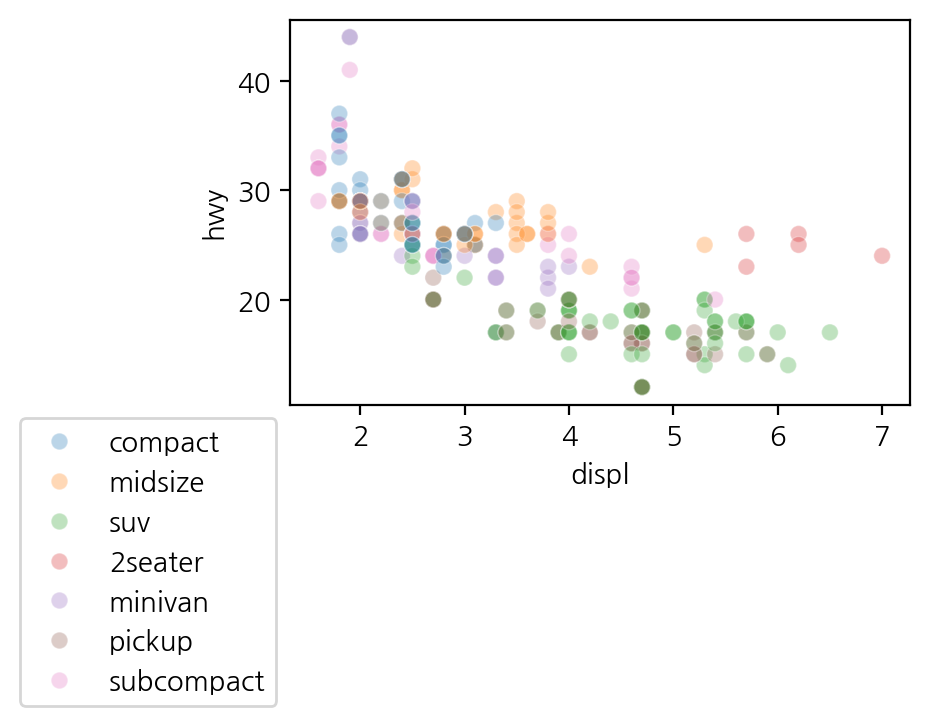

In [44]:
sns.scatterplot(data=mpg, x='displ', y='hwy',hue='category' ,alpha=.3);
plt.legend(loc=1,bbox_to_anchor=(0,0))

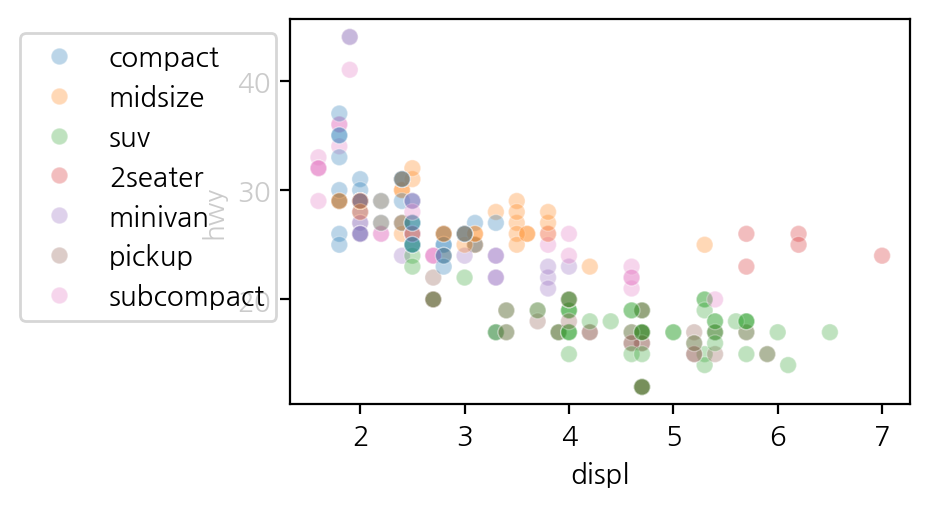

In [43]:
sns.scatterplot(data=mpg, x='displ', y='hwy',hue='category' ,alpha=.3);
plt.legend(loc=1,bbox_to_anchor=(0,1))

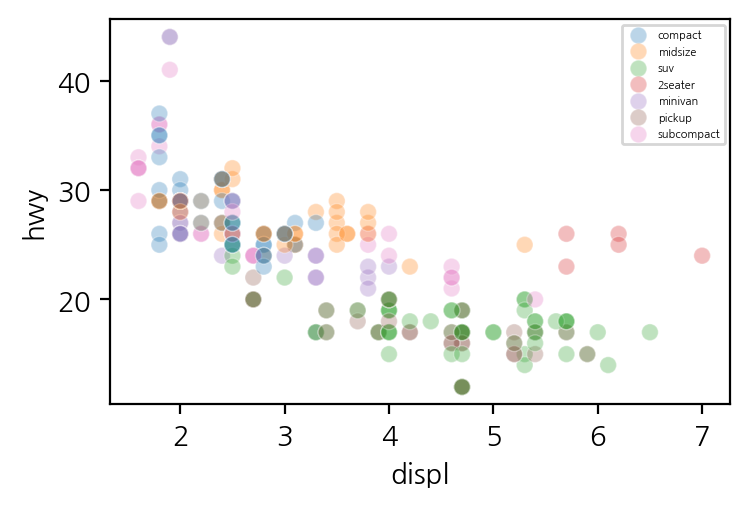

In [51]:
sns.scatterplot(data=mpg, x='displ', y='hwy',hue='category' ,alpha=.3);
plt.legend(loc=1,fontsize=4);#범례 크기조절

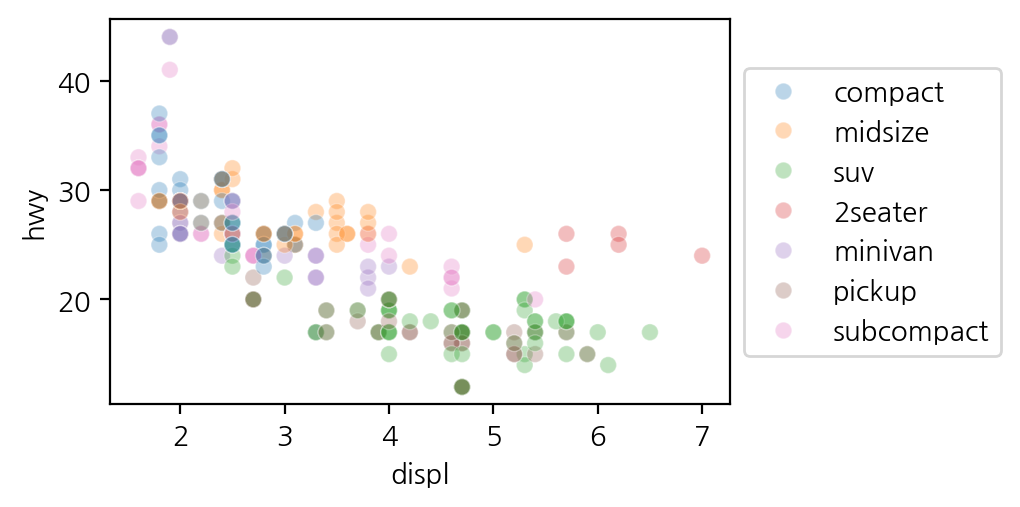

In [57]:
sns.scatterplot(data=mpg, x='displ', y='hwy',hue='category' ,alpha=.3);
plt.legend(loc=6,bbox_to_anchor=(1,.5))

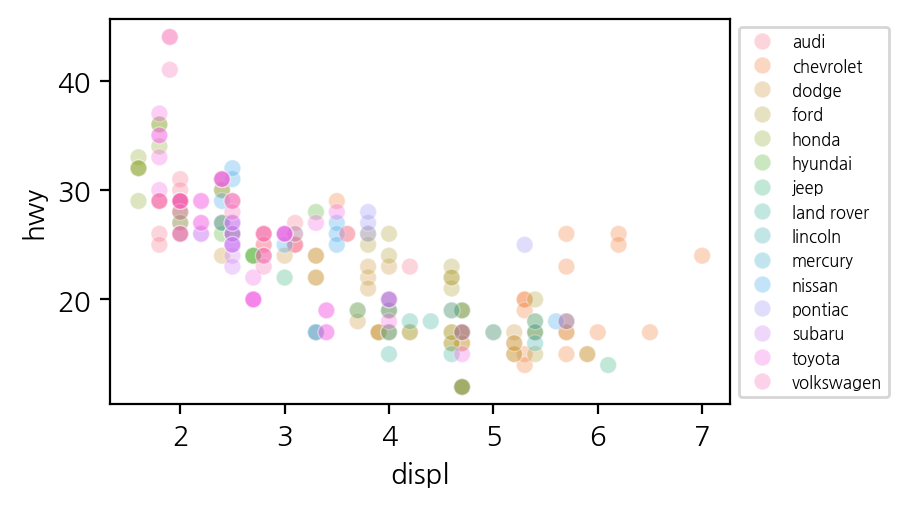

In [58]:
sns.scatterplot(data=mpg, x='displ', y='hwy',hue='manufacturer' ,alpha=.3);
plt.legend(loc=6,bbox_to_anchor=(1,.5),fontsize=6)

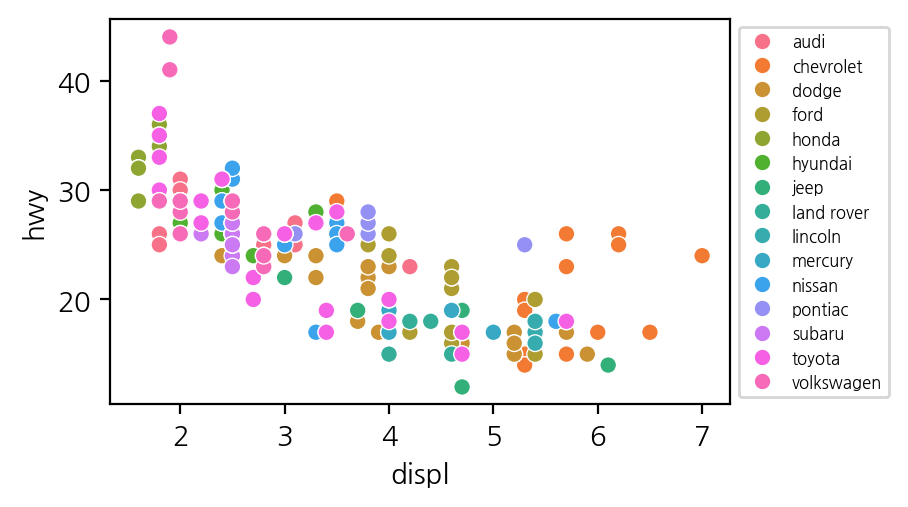

In [59]:
sns.scatterplot(data=mpg, x='displ', y='hwy',hue='manufacturer');
plt.legend(loc=6,bbox_to_anchor=(1,.5),fontsize=6)

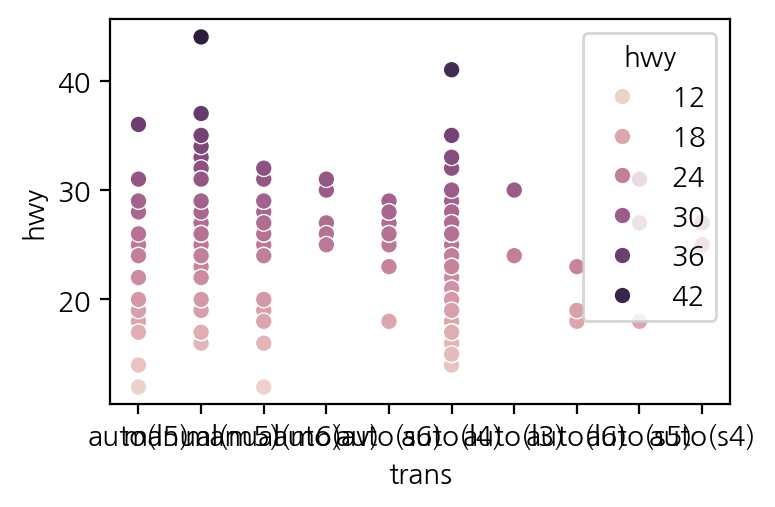

In [60]:
sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');

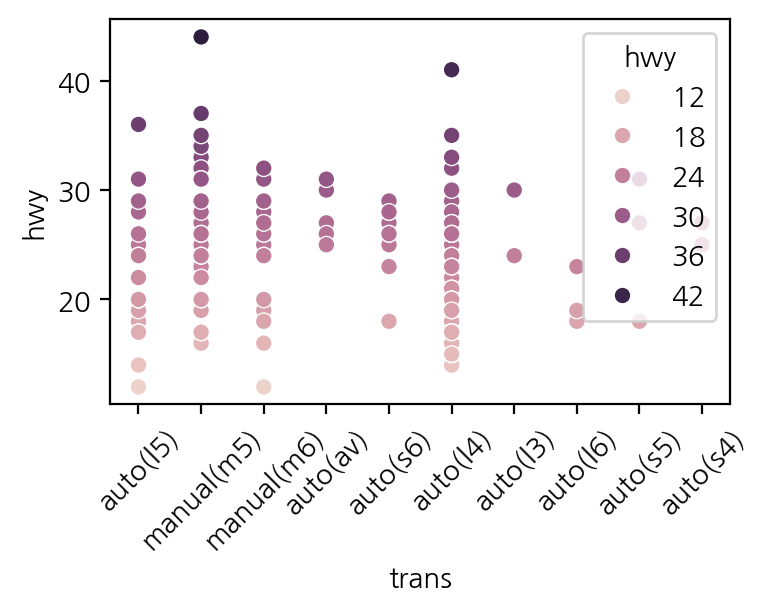

In [61]:
my=sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');
my.tick_params(axis='x',labelrotation=45)

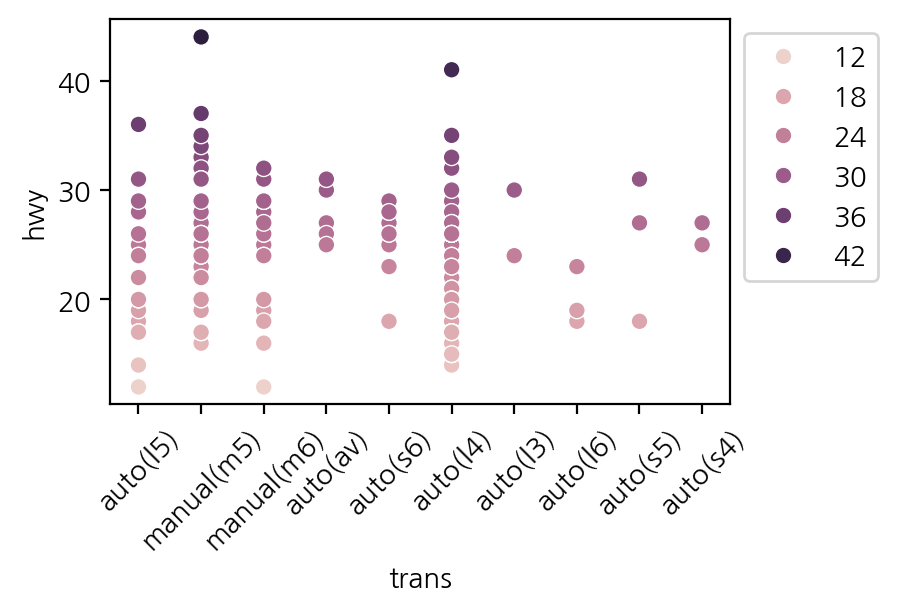

In [64]:
my=sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');
my.tick_params(axis='x',labelrotation=45)
my.legend(loc=2,bbox_to_anchor=(1,1))